In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import networkx as nx
import matplotlib.pyplot as plt

# Simular datos históricos de tiempos de viaje entre ciudades
np.random.seed(42)
cities = ["Bogotá", "Medellín", "Cali", "Cartagena", "Bucaramanga", "Santa Marta", "Pereira", "Barranquilla", "Ibagué", "Villavicencio", "Manizales", "Neiva", "Pasto", "Cúcuta", "Popayán", "Montería", "Valledupar"]
num_samples = 1000

data = []
for _ in range(num_samples):
    city1, city2 = np.random.choice(cities, 2, replace=False)
    distance = np.random.uniform(100, 1200)  # Distancia en km
    traffic = np.random.uniform(0, 1)  # Índice de tráfico
    weather = np.random.uniform(0, 1)  # Índice de clima
    time = distance / (80 + traffic * 20 - weather * 10)  # Tiempo estimado en horas
    data.append([city1, city2, distance, traffic, weather, time])

df = pd.DataFrame(data, columns=["City1", "City2", "Distance", "Traffic", "Weather", "Time"])

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df[["Distance", "Traffic", "Weather"]]
y = df["Time"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Ruta más corta: ['Bogotá', 'Montería', 'Cartagena']


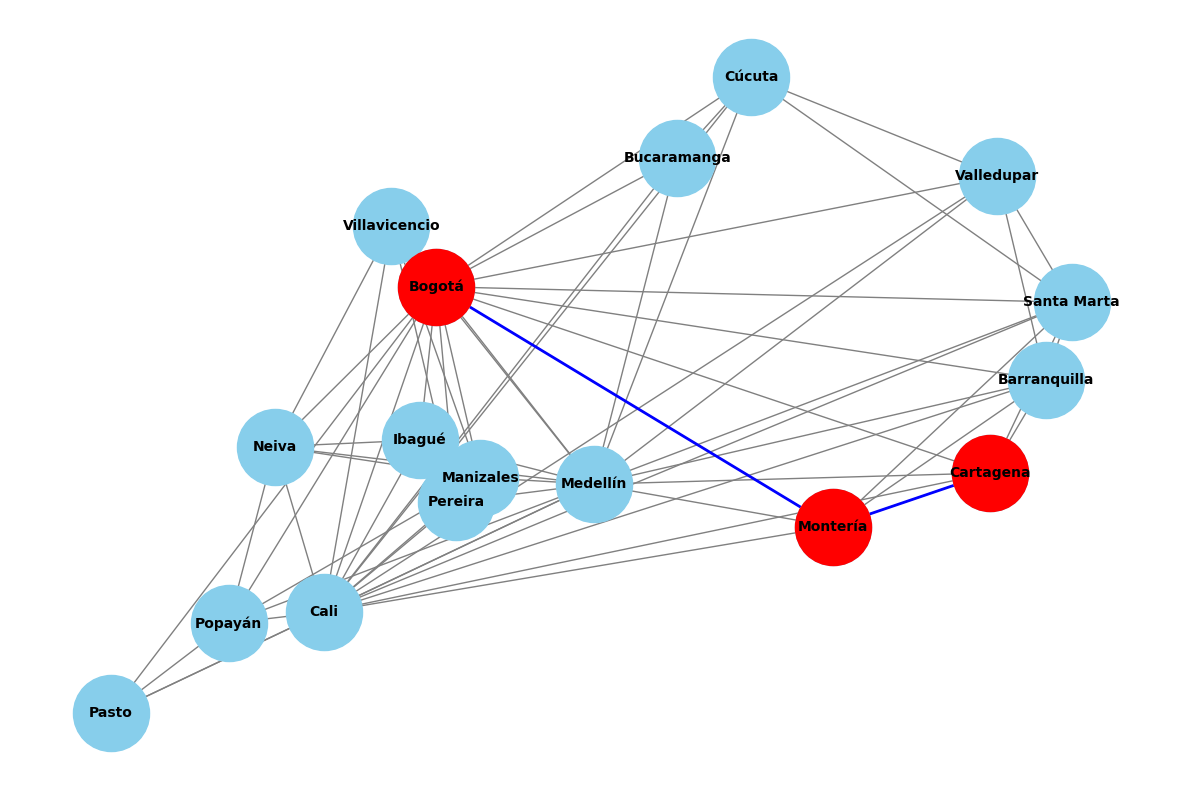

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import networkx as nx
import matplotlib.pyplot as plt

# Simular datos históricos de tiempos de viaje entre ciudades
np.random.seed(42)
cities = ["Bogotá", "Medellín", "Cali", "Cartagena", "Bucaramanga", "Santa Marta", "Pereira", "Barranquilla", "Ibagué", "Villavicencio", "Manizales", "Neiva", "Pasto", "Cúcuta", "Popayán", "Montería", "Valledupar"]
num_samples = 1000

data = []
for _ in range(num_samples):
    city1, city2 = np.random.choice(cities, 2, replace=False)
    distance = np.random.uniform(100, 1200)  # Distancia en km
    traffic = np.random.uniform(0, 1)  # Índice de tráfico
    weather = np.random.uniform(0, 1)  # Índice de clima
    time = distance / (80 + traffic * 20 - weather * 10)  # Tiempo estimado en horas
    data.append([city1, city2, distance, traffic, weather, time])

df = pd.DataFrame(data, columns=["City1", "City2", "Distance", "Traffic", "Weather", "Time"])

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df[["Distance", "Traffic", "Weather"]]
y = df["Time"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir los tiempos de viaje para las rutas originales
routes = [
   ("Bogotá", "Medellín", 415),
    ("Bogotá", "Cali", 464),
    ("Bogotá", "Cartagena", 1040),
    ("Medellín", "Cali", 415),
    ("Medellín", "Cartagena", 640),
    ("Cali", "Cartagena", 1010),
    ("Bogotá", "Bucaramanga", 400),
    ("Medellín", "Bucaramanga", 390),
    ("Cali", "Bucaramanga", 780),
    ("Bogotá", "Santa Marta", 940),
    ("Medellín", "Santa Marta", 725),
    ("Cali", "Santa Marta", 1070),
    ("Bogotá", "Pereira", 320),
    ("Medellín", "Pereira", 210),
    ("Cali", "Pereira", 220),
    ("Bogotá", "Barranquilla", 990),
    ("Medellín", "Barranquilla", 710),
    ("Cali", "Barranquilla", 1110),
    ("Bogotá", "Ibagué", 200),
    ("Medellín", "Ibagué", 345),
    ("Cali", "Ibagué", 230),
    ("Bogotá", "Villavicencio", 125),
    ("Medellín", "Villavicencio", 450),
    ("Cali", "Villavicencio", 520),
    ("Bogotá", "Manizales", 290),
    ("Medellín", "Manizales", 180),
    ("Cali", "Manizales", 260),
    ("Bogotá", "Neiva", 320),
    ("Medellín", "Neiva", 535),
    ("Cali", "Neiva", 430),
    ("Bogotá", "Pasto", 750),
    ("Medellín", "Pasto", 840),
    ("Cali", "Pasto", 520),
    ("Bogotá", "Cúcuta", 560),
    ("Medellín", "Cúcuta", 580),
    ("Cali", "Cúcuta", 870),
    ("Bogotá", "Popayán", 600),
    ("Medellín", "Popayán", 515),
    ("Cali", "Popayán", 140),
    ("Bogotá", "Montería", 760),
    ("Medellín", "Montería", 500),
    ("Cali", "Montería", 850),
    ("Bogotá", "Valledupar", 850),
    ("Medellín", "Valledupar", 590),
    ("Cali", "Valledupar", 1050),
    # Rutas adicionales para interconectar más ciudades
    ("Barranquilla", "Cartagena", 130),
    ("Barranquilla", "Santa Marta", 110),
    ("Cartagena", "Santa Marta", 210),
    ("Ibagué", "Pereira", 150),
    ("Ibagué", "Manizales", 190),
    ("Ibagué", "Neiva", 200),
    ("Villavicencio", "Pereira", 400),
    ("Villavicencio", "Manizales", 370),
    ("Villavicencio", "Neiva", 360),
    ("Manizales", "Pereira", 50),
    ("Manizales", "Neiva", 340),
    ("Manizales", "Popayán", 390),
    ("Neiva", "Popayán", 330),
    ("Pasto", "Popayán", 270),
    ("Pasto", "Cali", 520),
    ("Popayán", "Cali", 140),
    ("Cúcuta", "Bucaramanga", 190),
    ("Cúcuta", "Valledupar", 440),
    ("Cúcuta", "Santa Marta", 630),
    ("Montería", "Cartagena", 310),
    ("Montería", "Santa Marta", 430),
    ("Montería", "Barranquilla", 380),
    ("Valledupar", "Santa Marta", 220),
    ("Valledupar", "Barranquilla", 310)
]

# Crear el grafo y agregar aristas con los tiempos predichos
G = nx.Graph()
for city1, city2, distance in routes:
    traffic = np.random.uniform(0, 1)
    weather = np.random.uniform(0, 1)
    features = pd.DataFrame([[distance, traffic, weather]], columns=["Distance", "Traffic", "Weather"])
    predicted_time = model.predict(features)[0]
    G.add_edge(city1, city2, weight=predicted_time)

# Coordenadas aproximadas de las ciudades para la visualización
positions = {
     "Bogotá": (4.60971, -74.08175),
    "Medellín": (6.25184, -75.56359),
    "Cali": (3.43722, -76.5225),
    "Cartagena": (10.39105, -75.47943),
    "Bucaramanga": (7.12539, -73.1198),
    "Santa Marta": (11.24079, -74.19904),
    "Pereira": (4.81428, -75.69456),
    "Barranquilla": (10.96854, -74.78132),
    "Ibagué": (4.43889, -75.23222),
    "Villavicencio": (4.142, -73.62664),
    "Manizales": (5.07028, -75.51389),
    "Neiva": (2.9273, -75.28189),
    "Pasto": (1.21361, -77.28111),
    "Cúcuta": (7.89391, -72.50782),
    "Popayán": (2.44278, -76.60667),
    "Montería": (8.748, -75.88143),
    "Valledupar": (10.46314, -73.25322)
}

# Visualizar el grafo
fig, ax = plt.subplots(figsize=(15, 10))
nx.draw(G, positions, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", edge_color="gray", ax=ax)

# Encontrar y visualizar la ruta más corta utilizando el tiempo predicho
def dijkstra_path(G, start, end):
    return nx.dijkstra_path(G, source=start, target=end, weight='weight')

path = dijkstra_path(G, "Bogotá", "Cartagena")
print("Ruta más corta:", path)

# Dibujar la ruta más corta
path_edges = list(zip(path, path[1:]))
nx.draw_networkx_edges(G, positions, edgelist=path_edges, edge_color="blue", width=2, ax=ax)
nx.draw_networkx_nodes(G, positions, nodelist=path, node_color="red", node_size=3000)

plt.show()
